In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#Leemos nuestro dataset que esta en un archivo xlsx que paso el cliente
dfVentasComple = pd.read_excel('../Ventas Mar-Ago.xlsx')

#hacemos drop de unas columnas que comentaron que no son necesarias agregar en lo mas minimo creando una array de las columnas a eliminar
dropColumns = ['SKU','Código de Barras','Lote','Caducidad del Lote','Estado','Entrega','Cajero','Vendedor','Caja','Sucursal','Canal']
dfVentasComple = dfVentasComple.drop(columns=dropColumns).reset_index()

#Ahora estandarizamos los datos de la fecha de las ventas del cliente pasandolo de un string a un formato de fecha
dfVentasComple['Fecha'] = pd.to_datetime(dfVentasComple['Fecha'])

#Aplicamos el redondeo a los valores de las columnas dejandolo solo en 2 decimales
dfVentasComple['Descuento'] = dfVentasComple['Descuento'].round(2)
dfVentasComple['Margen'] = dfVentasComple['Margen'].round(2)
dfVentasComple['Total'] = dfVentasComple['Total'].round(2)

#Cambiamos el nombre de una columna ya que no se entendia muy bien ya que es precio unitario es decir precio por cada pieza
dfVentasComple = dfVentasComple.rename(columns={'Precio Unitario': 'Precio de Venta'})

#Igualmente creamos 2 nuevas columnas dentro de nuestro set de datos el cual tendra el mes y año de la fecha de la venta que se realizo esto
#para un analisis todavia mas profundo de los datos.
dfVentasComple['Mes'] = dfVentasComple['Fecha'].dt.month
dfVentasComple['Año'] = dfVentasComple['Fecha'].dt.year

#En otro dataframe almacenamos los productos que sean de envio ya que esos no se tomaran para el analisis de las ventas si no como gastos
dfEnvios = dfVentasComple[dfVentasComple['Producto'] == 'Envio'].reset_index()

#Ahora ya que sacamos los envios en el mismo dataframe solo obtenemos las ventas que no sean envios para su analisis
dfVentasComple = dfVentasComple[dfVentasComple['Producto'] != 'Envio'].sort_values(by= 'Fecha', ascending = True).reset_index(drop=True)

#Obtenemos un valor que dentro de el set de datos que no estaba, este es el costo unitario por producto es decir lo que le cuesta cada
#producto unitariamente ya que el set de datos lo tiene todo junto
dfVentasComple['Costo Unitario'] = dfVentasComple['Costo'] / dfVentasComple['Cantidad']

#Reordenamos todo nuestro DF principal de las ventas para su mejor manipulacion y visualizacion
dfVentasComple = dfVentasComple[["index", "Número de Venta", "Fecha", "Mes", "Año", "Producto", "Categoria", "Marca",
         "Costo Unitario", "Cantidad", "Costo", "Subtotal", "Descuento",
         "Total", "Margen", "Cliente"]]


#Apartir de nuestro DF principal de ventas de suplementos, agrupamos por cliente, y sumamos los valores de Cantidad, Total y Margen con el fin de
#poder obtener el de cada CLIENTE el Total de piezas compradas, el TOTAL de dinero de compra y el MARGEN de cada uno de los clientes ordenados por
#los primeros 10 clientes que mayor MARGEN han dejado
dfClientesComprasGeneral = (dfVentasComple.groupby(['Cliente'])[['Cantidad','Total','Margen']].sum().reset_index()
    .sort_values(by=['Margen'], ascending=[False]).head(10))

dfClientesComprasGeneral['Total'] = dfClientesComprasGeneral['Total'].round(2)
dfClientesComprasGeneral['Margen'] = dfClientesComprasGeneral['Margen'].round(2)
dfClientesComprasGeneral

C:\Users\CESAR\AppData\Local\Temp\ipykernel_31188\324981790.py:14: UserWarning:

Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,Cliente,Cantidad,Total,Margen
30,Jose Flores Comple May,89,31356.58,17236.58
45,Roberto Rivera Comple May,121,47385.01,15042.01
49,Tlaco Sport Comple Web,13,23534.23,14434.23
27,Jesus Manuel Comple S May,230,34500.00,11500.00
7,Angel Rangel Comple S May,58,46590.00,9265.00
41,Oscar Espinoza Comple S May,78,22695.00,5660.00
4,Alejandro Garza Comple Web H,12,10878.38,4878.38
0,Abner Herrera Comple S May,58,20205.00,4685.00
3,Agustin Campos Comple May,28,11340.00,3995.00
13,Cristian Kent Comple S May,56,17262.48,3292.48


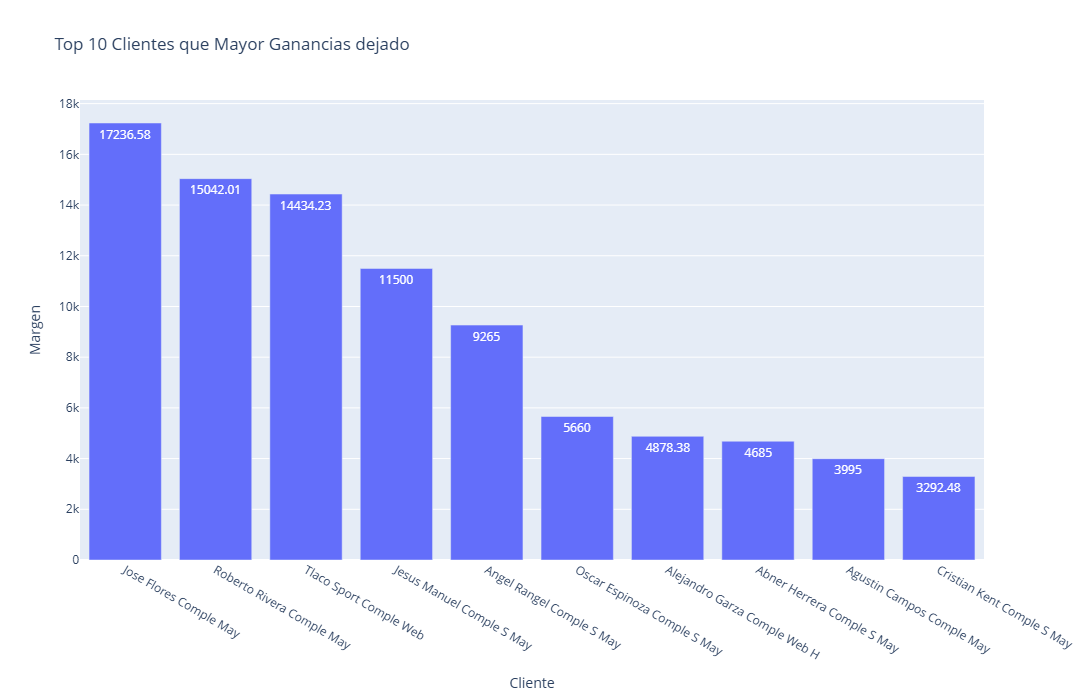

In [11]:
#Con nuestro DF de Compras de Clientes en general, obtenemos los primeros 10 clientes que mayores MARGENES han dejado en su historial de compras
fig = px.bar(dfClientesComprasGeneral, x='Cliente', y='Margen', title="Top 10 Clientes que Mayor Ganancias dejado",
             text='Margen',
             height=700)
fig.show()

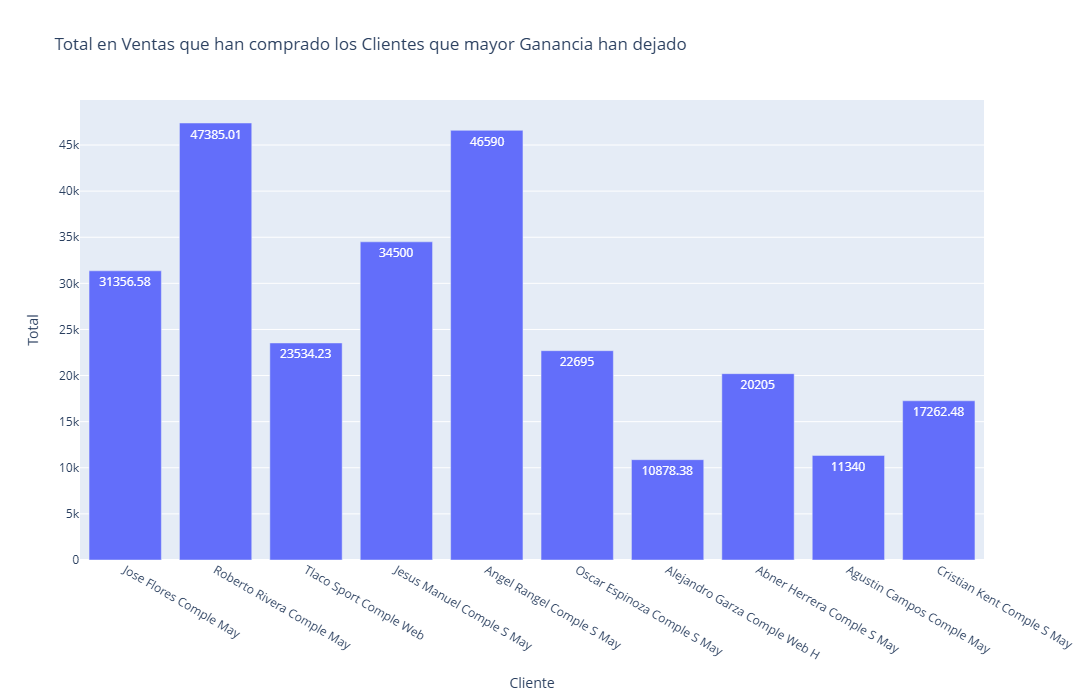

In [12]:
#Con nuestro DF de Compras de Clientes en general, obtenemos los primeros 10 clientes que mayores MARGENES han dejado en su historial de compras
fig = px.bar(dfClientesComprasGeneral, x='Cliente', y='Total', title="Total en Ventas que han comprado los Clientes que mayor Ganancia han dejado",
             text='Total',
             height=700)
fig.show()

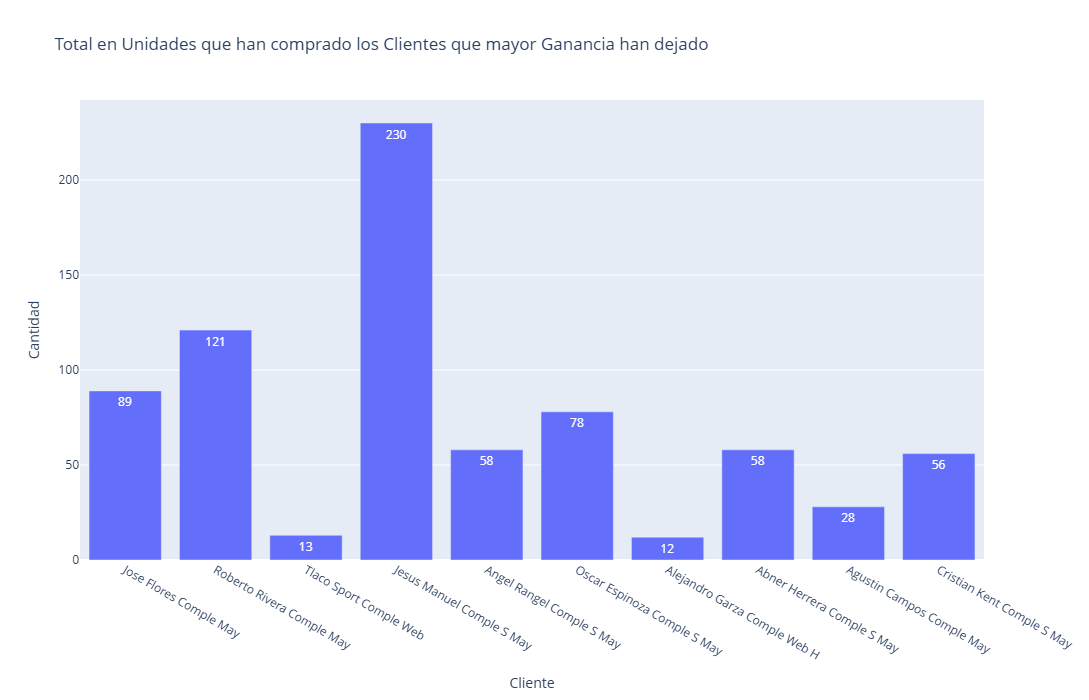

In [13]:
#Con nuestro DF de Compras de Clientes en general, obtenemos los primeros 10 clientes que mayores MARGENES han dejado en su historial de compras
fig = px.bar(dfClientesComprasGeneral, x='Cliente', y='Cantidad', title="Total en Unidades que han comprado los Clientes que mayor Ganancia han dejado",
             text='Cantidad',
             height=700)
fig.show()